# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import  matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:


import seaborn as sns
sns.set(color_codes=True)



### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,355,251]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,190,727,2012,245,184,127
2,6134,23133,33586,6746,18594,5121


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [6]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,190,727,2012,245,184,127
2,6134,23133,33586,6746,18594,5121


## plotting paiwise distribution of 6 product categories ##

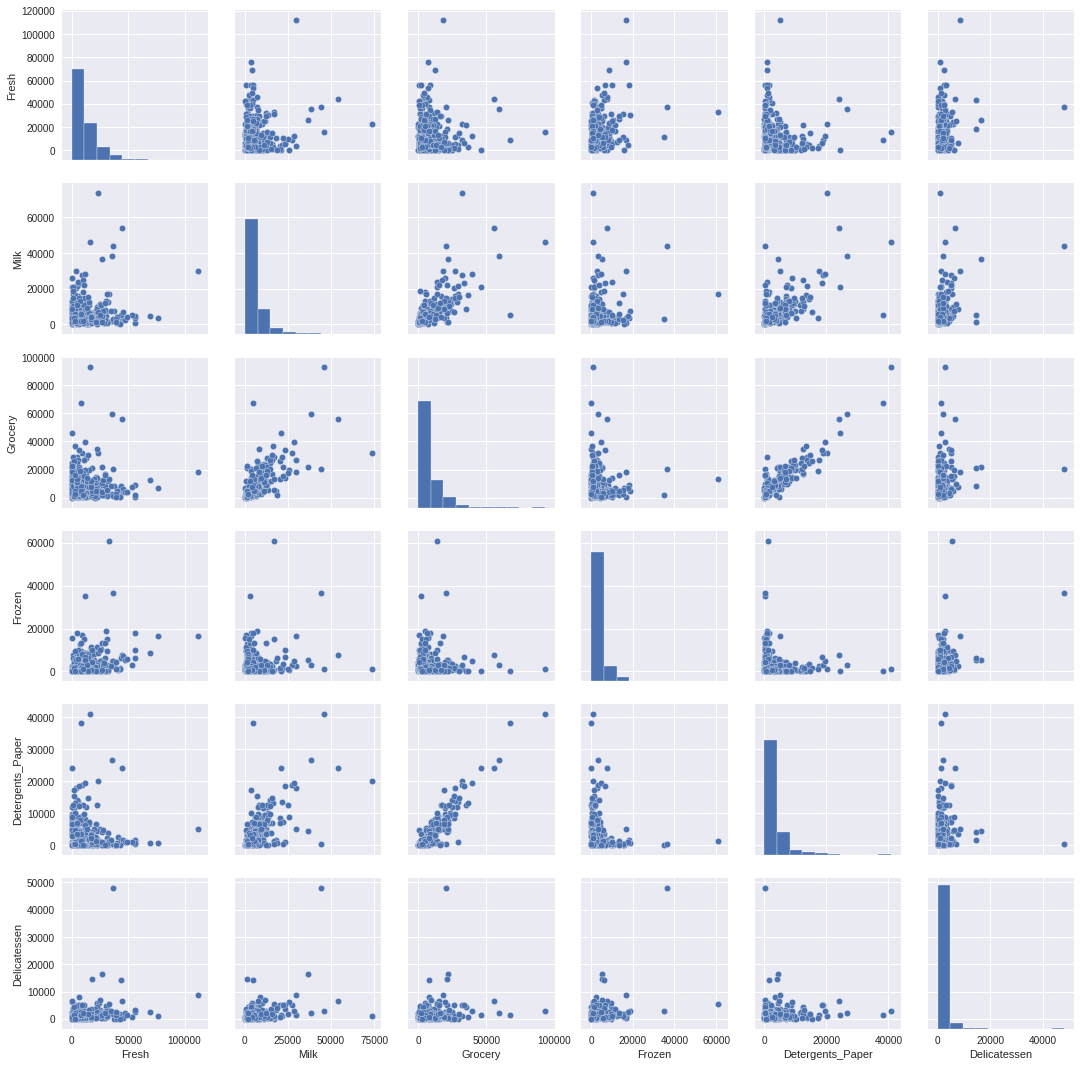

In [7]:
g = sns.PairGrid(data)
g.map_diag(plt.hist,edgecolor="w")
g.map_offdiag(plt.scatter,edgecolor="w", s=40);

## 1. comparison of sample values with corresponding means from full data##

In [8]:

display(samples-data.describe().loc['mean'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2587.297727,2462.734091,-2825.277273,-2405.931818,-1086.493182,-73.870455
1,-11810.297727,-5069.265909,-5939.277273,-2826.931818,-2697.493182,-1397.870455
2,-5866.297727,17336.734091,25634.722727,3674.068182,15712.506818,3596.129545


## 2. table of differenc of sample values with median of complete data

In [9]:
display(samples-data.describe().loc['50%'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,909.0,4632.0,370.5,-860.0,978.5,485.5
1,-8314.0,-2900.0,-2743.5,-1281.0,-632.5,-838.5
2,-2370.0,19506.0,28830.5,5220.0,17777.5,4155.5


## 3. Quantalisation of Data ##
the productwise expenditure of samples shortlisted above are converted to labels based to division into 5 quantile ranges(obtained by ranking along each product category) : very low , low, medium, high, veryhigh 

In [10]:
data_quant = pd.read_csv("customers.csv")
data_quant.drop(['Region', 'Channel'], axis = 1, inplace = True)
for lab in data_quant.keys():
    data_quant[lab]= pd.qcut(data_quant[lab], 5,labels=['VeryLow','Low','Medium','High','VeryHigh'])
samples_quant = pd.DataFrame(data_quant.loc[indices], columns = data_quant.keys()).reset_index(drop = True)
display(samples_quant)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Medium,High,Medium,Low,High,High
1,VeryLow,VeryLow,Low,VeryLow,VeryLow,VeryLow
2,Low,VeryHigh,VeryHigh,VeryHigh,VeryHigh,VeryHigh


**Answer:**
****
Deduction as to what kind of establishment each sample represents depends on expenditure levels on various product categories.
1. **Sample 1** : Expenditure on milk, detergents, paper products and delicatessen is high. This establishment can be **a food joint in a business or commercial area**. In such cafes people often come to have varied types of food items : Coffee, Cakes, Pancakes, Salads, Good Meat. Hence High expenditure (8259 mu) on milk products is justified. Delicatessen expenditure is high supports as such places have expensive meat dishes on their menu. Medium expenditure on Fresh products(9413 mu) and Grocery Products(5126 mu) is also justified as Cafe as described has requirement for vegetables, fruits, sugar, cornflakes, wheat flour etc to serve their customers. High detergent consumption goes along with it being a Cafe in busy area. Frozen items are not in required much in such cafe as they would like to sell freshly prepared products to their clientele

2. **Sample 2** : Expenditure on all product items is low or very low. This means in such establishment these product categories don't directly effect their business. So such an establishment my be **Office of some Software company** where few people work (under 20). The products are for the consumption of employees

3. **Sample 3** : Expenditure on all categories except 'Fresh' is very high, which indicates the consumption rate is very high. This indicates that the establishment does **Retail in these products**


    


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
# function for decision tree regressor
def reg_score(feature,data):
    from sklearn.cross_validation import train_test_split
    from sklearn.tree import DecisionTreeRegressor

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis = 1)
    target=data[feature]
    score=0
    for i in xrange(0,100):
        # TODO: Split the data into training and testing sets using the given feature as the target
        X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = i)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor(criterion='mse',random_state=i).fit(X_train,y_train)

        # TODO: Report the score of the prediction using the testing set
        score = score+regressor.score(X_test,y_test)
    return score/(i+1)

In [12]:
# function for linear regressor, returns score averaged over random states 1-100
def reg_score2(feature,data):
    from sklearn.cross_validation import train_test_split
    from sklearn import linear_model
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(feature, axis = 1)
    target=data[feature]
    score=0
    for i in xrange(0,100):
        # TODO: Split the data into training and testing sets using the given feature as the target
        X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = i)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = linear_model.LinearRegression().fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
        score=score+regressor.score(X_test,y_test)
    return score/(i+1)

## Regression using DecisionTree Regressor ##

In [13]:
for feature in data.keys():
    print 'R2 score for',feature,'\t',':',reg_score(feature,data)

R2 score for Fresh 	:

/home/atrij/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


 -0.649747447806
R2 score for Milk 	: 0.14234626599
R2 score for Grocery 	: 0.666235862937
R2 score for Frozen 	: -1.35208588345
R2 score for Detergents_Paper 	: 0.686152510286
R2 score for Delicatessen 	: -2.23333452417


## Regression  using Linear Regressor ##

In [14]:

for feature in data.keys():
    print 'R2 score for',feature,'\t',':',reg_score2(feature,data)

R2 score for Fresh 	: 0.00806284978643
R2 score for Milk 	: 0.541063245541
R2 score for Grocery 	: 0.855591055434
R2 score for Frozen 	: 0.1714536262
R2 score for Detergents_Paper 	: 0.851042900677
R2 score for Delicatessen 	: -0.356802495955


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I performed Regression fitting for all the labels and found that, 'Grocery' and 'Detergents_Paper' have R2 score greater than 0.5 for decision tree regressor. While for other labels the score is either low or negative hence can't be predicted well using other features. In case of linear regressor I found High R2 scores for Milk, Grocery and Detergent_paper. Features for which high regressio score is obtained can be estimated using other variables hence not necessary for identifying customer habits
Hence, 
* Features necessary for identifying spending habits(low regression score):
    * Fresh
    * Milk
    * Frozen
    * Delicatessen
* Features not necessary for identifying customer habits(high regression score):
    * Grocery
    * Detergent_Paper

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [15]:
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Visualisation :Regression Lines and Scatter plots

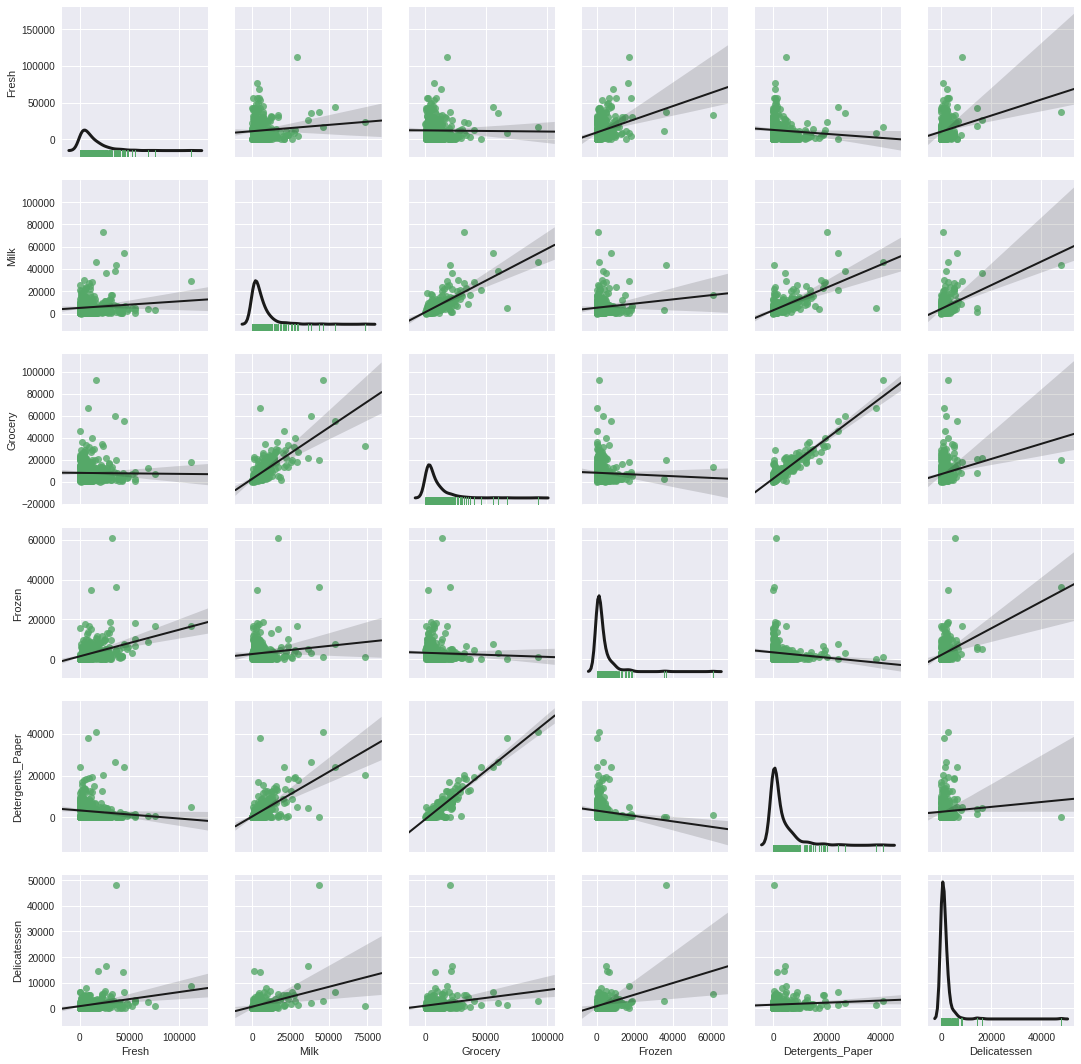

In [16]:
g = sns.PairGrid(data)
g.map_diag(sns.distplot,kde=True,rug=True,hist=False,kde_kws={"color": "k", "lw": 3},rug_kws={"color": "g"})
g.map_offdiag(sns.regplot,scatter_kws={"color":'g','marker':'-'},line_kws={'color':'k','linewidth':2.0});

## Visualisation : KDE plot

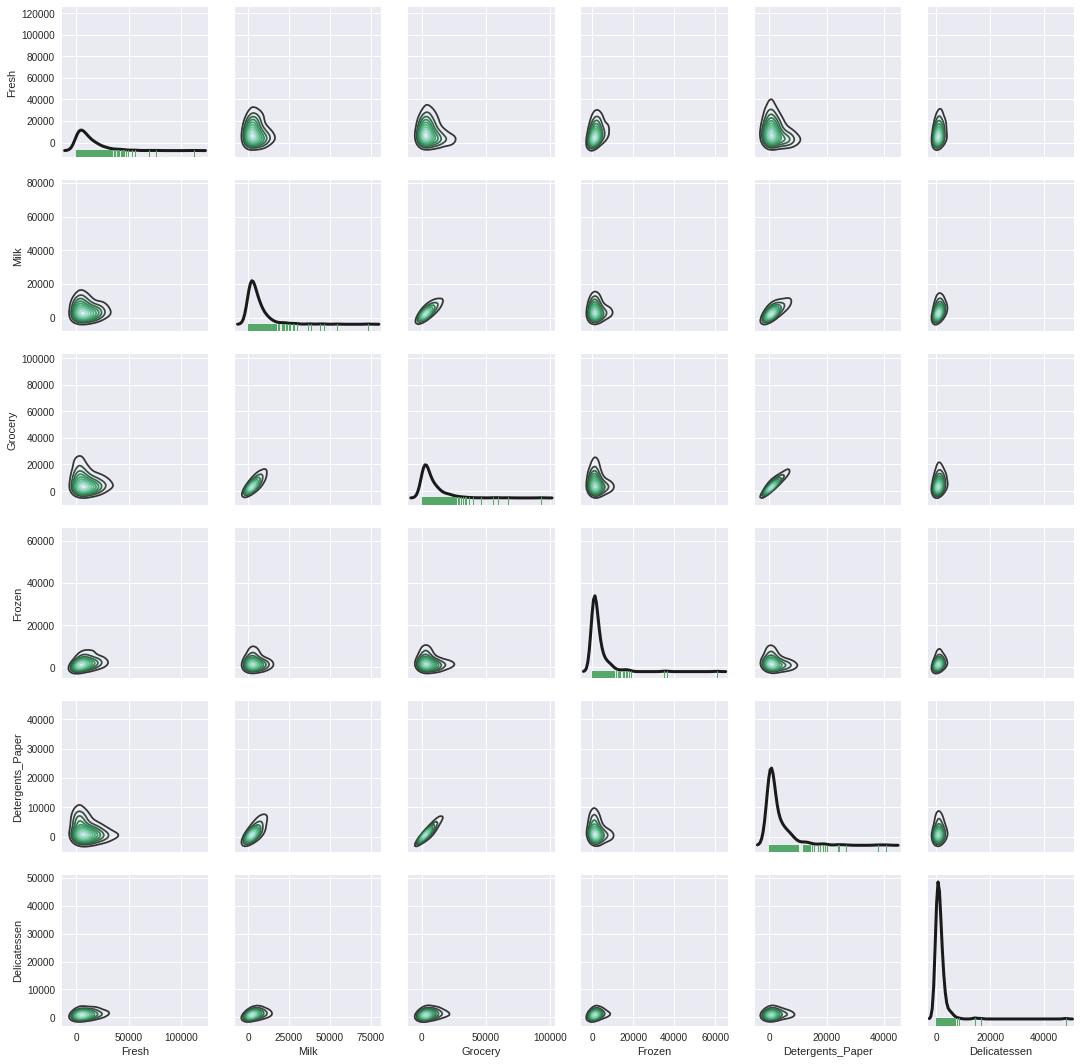

In [17]:
g = sns.PairGrid(data)
g.map_diag(sns.distplot,kde=True,rug=True,hist=False,kde_kws={"color": "k", "lw": 3},rug_kws={"color": "g"})
g.map_offdiag(sns.kdeplot);

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
****
#### 1. Are there any pairs of features which exhibit some degree of correlation? ####
Observing the plots there seem to be correlation between following pairs:
* Grocery & Milk (prominent)
* Grocery & Detergent_Paper (prominent)
* Milk & Detergent_Paper (prominent)
* frozen and fresh (weak correlation)

#### 2. Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? ####
Yes the correlations confirm that Grocery and detergent_paper variable could be predicted 

#### 3. How is the data for those features distributed? ####
* Grocery : Unimodal, positive skewed
* Detergent_paper : unimodal, positive skewed
* Grocery & Milk : bivariate gaussian distribution (tilted elllipse shape)
* Grocery & Detergent_Paper : bivariate gaussian distribution ( tilted ellipse shape)
* Milk & Detergent_Paper : bivariate gaussian distribution ( tilted ellipse shape)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

In [18]:
skewed = data.keys()
skewed[0]

'Fresh'

In [19]:
# TODO: Scale the data using the natural logarithm
log_data = data.copy()
log_data[skewed] = log_data[skewed].apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.copy()
log_samples = log_samples[skewed].apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Pairplot of logdata : KDE##

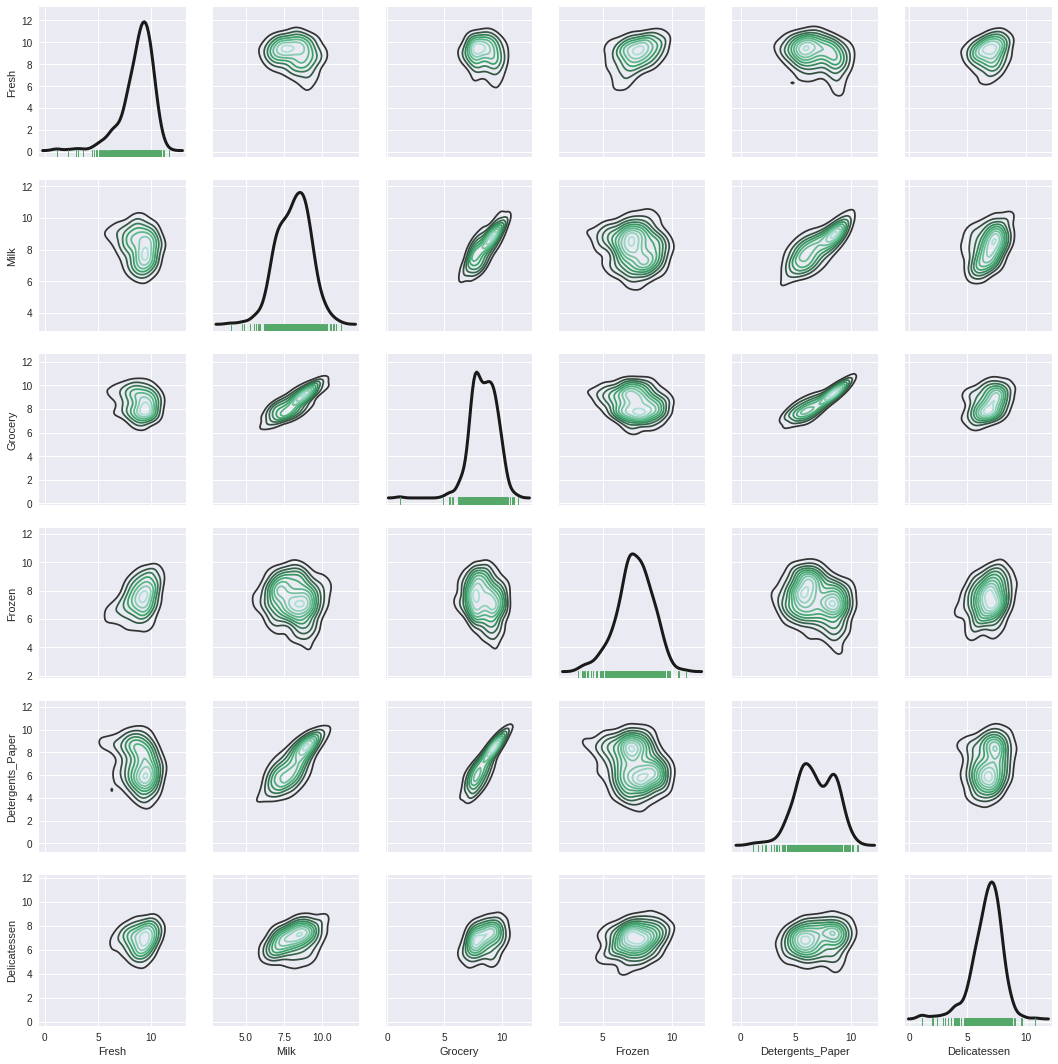

In [20]:
g = sns.PairGrid(log_data)
g.map_diag(sns.distplot,kde=True,rug=True,hist=False,kde_kws={"color": "k", "lw": 3},rug_kws={"color": "g"})
g.map_offdiag(sns.kdeplot);

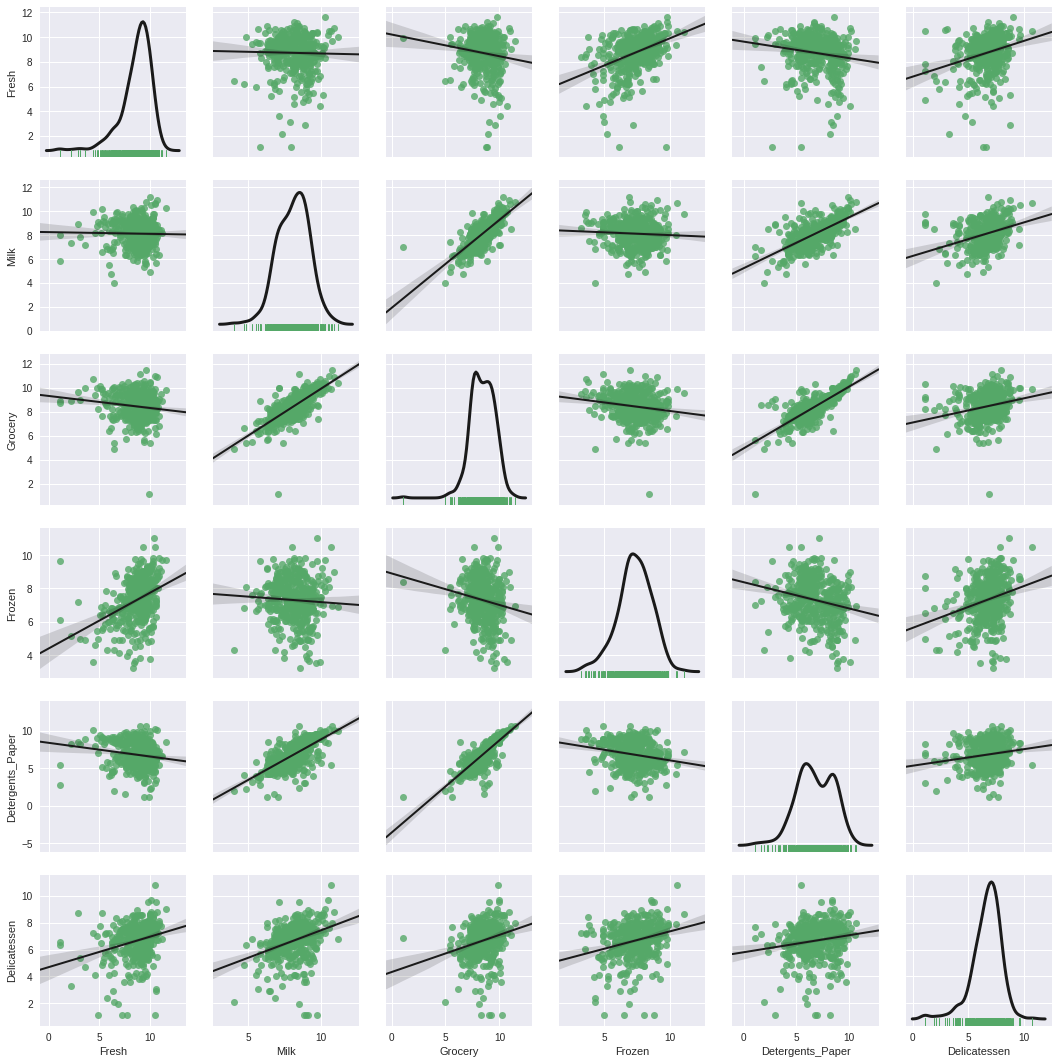

In [21]:
g = sns.PairGrid(log_data)
g.map_diag(sns.distplot,kde=True,rug=True,hist=False,kde_kws={"color": "k", "lw": 3},rug_kws={"color": "g"})
g.map_offdiag(sns.regplot,scatter_kws={"color":'g','marker':'-'},line_kws={'color':'k','linewidth':2.0});

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [22]:
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [23]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,5.247024,6.588926,7.606885,5.501258,5.214936,4.844187
2,8.721602,10.049015,10.421865,8.816705,9.830594,8.541105


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [24]:
import collections as col

In [25]:
# For each feature find the data points with extreme high or low values
c = col.Counter() 
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print Q1,Q3
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    b=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for ind in b.index:
        c[ind] += 1
# OPTIONAL: Select the indices for data points you wish to remove
outliers  =[]
for vals in c.iterkeys():
    if c[vals]>1:
        outliers.append(vals)
    

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

8.04805870221 9.73706394795
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


7.33498124004 8.88048008859
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


7.67461620137 9.27385367724
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


6.60967774917 8.17589608318
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


5.54810142479 8.27434059875
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


6.01187465693 7.50672842655
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [26]:
# table of values for each of the spending categories
log_data.iloc[outliers]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


In [27]:
# table of data description of log data
log_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [28]:
good_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,8.766671,8.128376,8.460236,7.324601,6.799008,6.694349
std,1.423133,1.062911,1.046108,1.261038,1.684562,1.261066
min,1.098612,4.718499,5.384495,3.218876,1.098612,1.098612
25%,8.073389,7.364809,7.676010,6.647029,5.560615,6.019808
50%,9.055439,8.198089,8.467372,7.340187,6.700731,6.874198
75%,9.737108,8.877379,9.274768,8.177371,8.277644,7.509609
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Visualisation : pairplot with potential outliers marked in black


/home/atrij/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


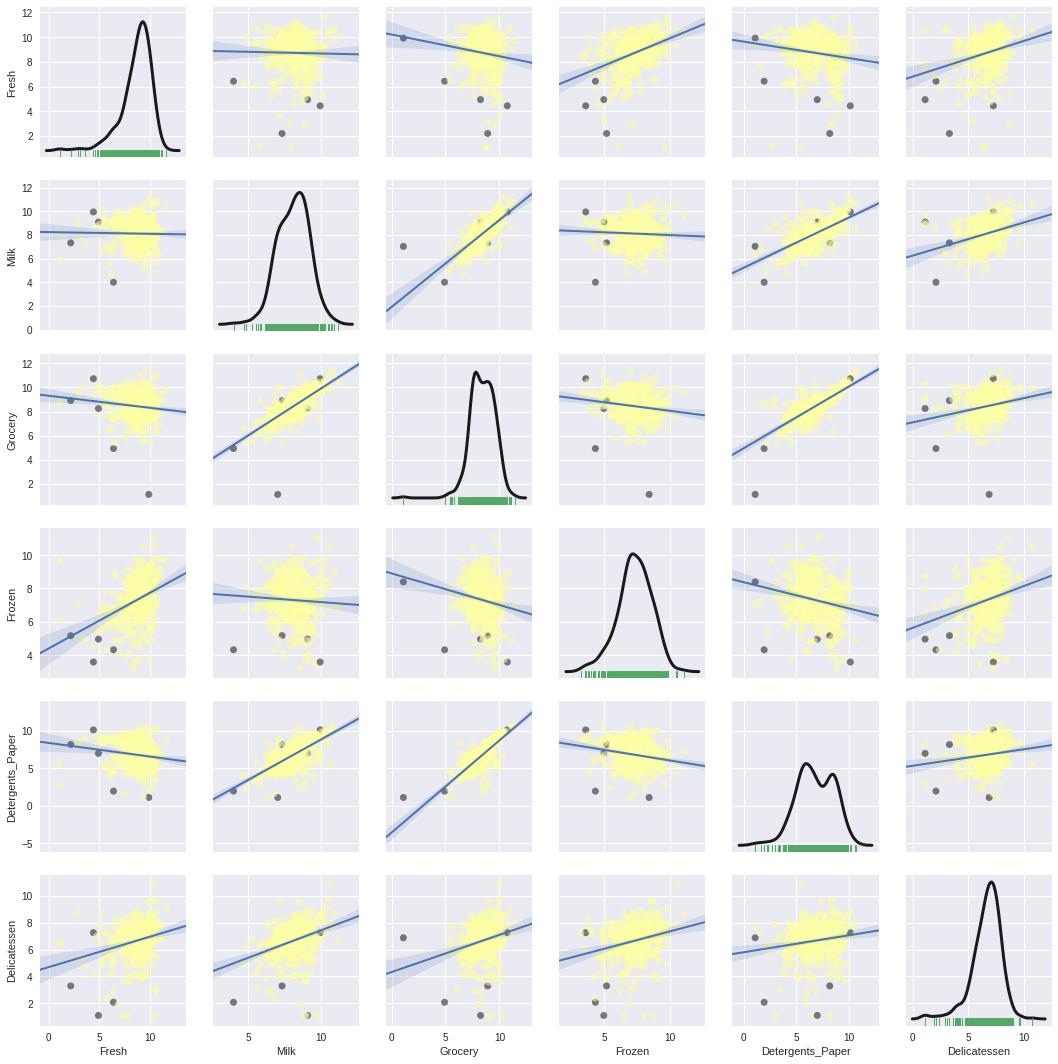

In [30]:
a=log_data.copy()
a['out']=10
a['out'][outliers]=1
b=a['out']
b=np.array(b)
g = sns.PairGrid(log_data)
g.map_diag(sns.distplot,kde=True,rug=True,hist=False,kde_kws={"color": "k", "lw": 3},rug_kws={"color": "g"})
g.map_offdiag(sns.regplot,scatter_kws={'color':None,'c': b,'alpha':0.5, 'cmap':'inferno'},line_kws={'linewidth':2.0});

**Answer:**
###### Yes there are data points that are outliers for more than one feature (below are the idices of these points) ##### 
* 65 (Fresh, Frozen)
* 66 (Fresh, Delicatessen)
* 75 (grocery, detergent_paper)
* 128 (fresh, delicatessen)
* 154 (milk, grocery, delicatessen)

###### Should these data points be removed from the dataset? #####
* Decision whether such data-points should be removed would depend on following considerations:
    * If the outlier does not change the results but does affect assumptions, you may drop the outlier
    * If the outlier creates a significant association, you should drop the outlier
    * If it is obvious that the outlier is due to incorrectly entered or measured data, you should drop the outlier
* based on the criteria discussed above and observing the pairplots of log_data (plotted above with yellow and black marker) and good_data(plotted below with green marker) following observations can be made. Note that good_data is obtained after removing all 5 points:
    1. On removal of outliers, black points on graph above, the regression line has become more reasonable in some cases, and in some confidence interval has also improved. this effect can be seen for following sub-plots
        * milk vs grocery
        * grocery vs detergent_paper
        * delicatessen vs grocery
        * delicatessen vs milk
    2. The removal of points hasn't changed representation in other plots
  Therefore using the rationale provided above these points should be removed
##### if any data points were added to the outliers list to be removed, explain why. #####
All 5 shortlisted datapoints above have been removed. The association obtained among different features has become more resonable after removal of these points. It can be seen by comparing the graphs plotted below and above. Follow the observational argument provided in section above.
   

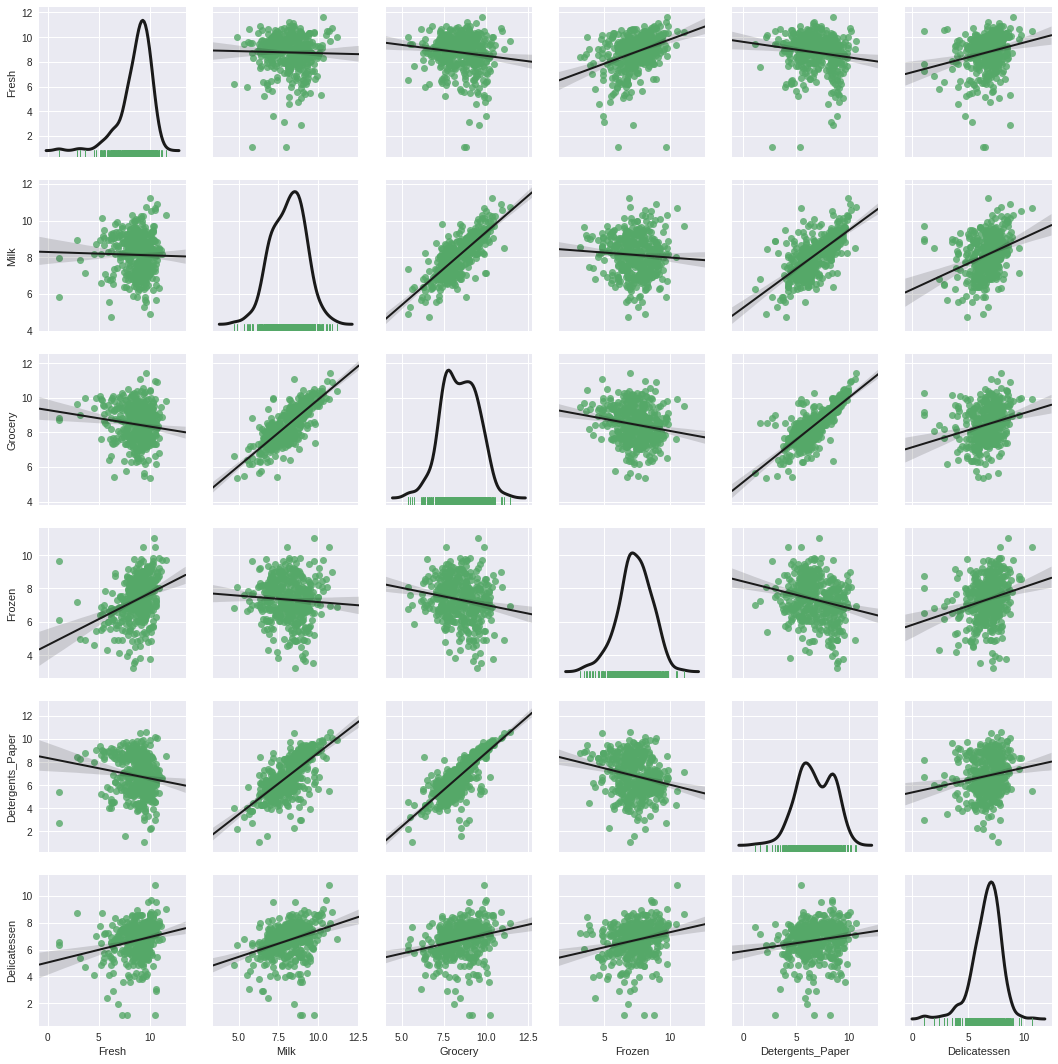

In [31]:
g = sns.PairGrid(good_data)
g.map_diag(sns.distplot,kde=True,rug=True,hist=False,kde_kws={"color": "k", "lw": 3},rug_kws={"color": "g"})
g.map_offdiag(sns.regplot,scatter_kws={"color":'g','marker':'-'},line_kws={'color':'k','linewidth':2.0});

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

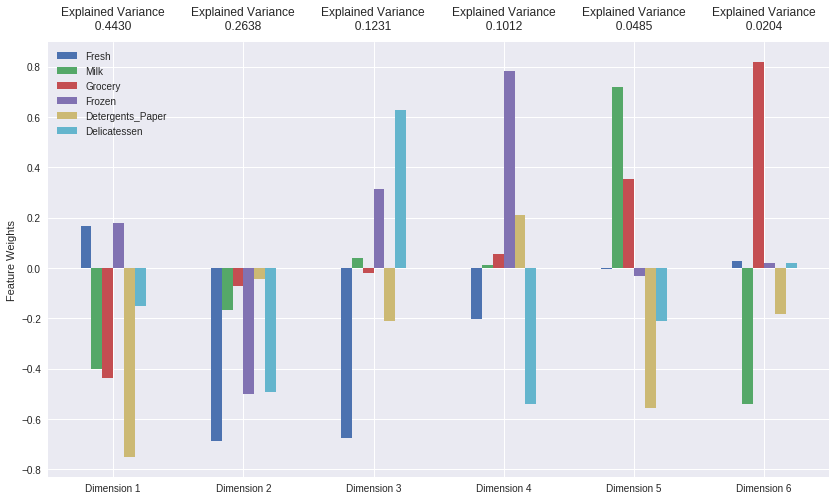

In [32]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [33]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


In [34]:
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
#####  How much variance in the data is explained in total by the first and second principal component?  #####
Ist component explains 0.4430, second component explains 0.2638. They both combined explain **70.68%** of total variance in data

#####  What about the first four principal components?  #####
First four components explain **93.11%** of variance in data


## Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.

### Simulating effect of change is each dimension of principal components
to understand actually what each dimension obtained from principal component analysis signify in terms of customer spending in each product category, I will vary only the dimension , which is to be analysed, while keeping others constant in a dummy vector , this vector lives in space formed by principal components, and  then observe changes in customer spending values caused. 

#####  Observation of Dimension 1 simulation graph
Looking at the graph below, it can be seen that changes along dimension 1 is indicative of changes in spending in detergent_paper majorly. For grocery and milk spending also change but to a lesser extent that that in detergent_paper. Change in spending along all other categories doesn't change much.

###### analysis of dimension 1
* Dimesnion 1 is composed of positive weights from **Fresh(0.1675)** and **Frozen(0.1782)** and negative weights from **detergent_paper(-0.7514)** , **Delicatessen(-0.1499)**, **milk(-0.4014)**, **grocery(-0.4381)**. As Delicatessen product has low weight, dimension 1 is not indicative of spending in this category (same can be observed in graph produced below, where changes in value along dimension 1 doesn't cause corresponding changes in spending in this category). Based on weight decomposition following is the representation given by this dimension: 
* Higher value in this dimesion corresponds to high spending on frozen or fresh items coupled with low spending on Milk, Grocery and detergent_paper. This can be validated by the graph produced below as near high values the trend discussed is observed
* Low value indicates that spending on Milk, Grocery or Delicatessen  has been high and spending on Fresh & frozen has been low or moderate. This can be validated by the graph produced below as near low values the trend discussed is observed
* **Summary**: *While analysing values along this dimension Customer spending behaviour on Detergent_paper, grocery and milk can be best generalised as low values indicate higher spending in these categories and high values indicate low spending in these categories*

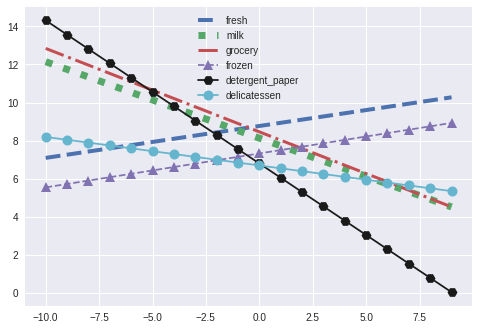

In [35]:
inv_x_dim=[]
for i in xrange(-10,10):
    y=[i,0,0,0,0,0] # dummy vector with dimension 1 changing and keeping all others constant
   # print i
    x=pca.inverse_transform(y)
    inv_x_dim.append(x)
inv_x_dim=np.array(inv_x_dim)
rang=xrange(-10,10)

fig, ax = plt.subplots()
ax.plot(rang, inv_x_dim[:,0], 'b--',linewidth=4,label='fresh')
ax.plot(rang, inv_x_dim[:,1], 'g:',linewidth=7,label='milk')
ax.plot(rang, inv_x_dim[:,2], 'r-.',linewidth=3,label='grocery')
ax.plot(rang, inv_x_dim[:,3], 'm^--',markersize=10,label='frozen')
ax.plot(rang, inv_x_dim[:,4], 'kH-',markersize=10,label='detergent_paper')
ax.plot(rang, inv_x_dim[:,5], 'co-',markersize=10,label='delicatessen')
legend = ax.legend(loc='upper center', shadow=True)

plt.show()


#####  Observation of Dimension 2 simulation graph
Looking at the graph below, it can be seen that changes along dimension 2 is indicative of changes in spending in Fresh, frozen and delicatessen majorly. For grocery, milk and detergent_paper spending change very less. 

###### analysis of dimension 2
* Dimesnion 2 is composed of all negative weights higher magnitude is with **fresh(-0.6859)**, **frozen(-0.5005)** and **delicatessen(-0.4941)**. This dimension doesn't provide spending info on other categories as corresponding weights are quite low Based on weight decomposition following is the representation given by this dimension:
* Higher value in this dimesion corresponds to significantly low spending on Fresh, Frozen and Delicatessen
* low values corresponds to high spending on Fresh, Frozen, Delicatessen
* the above points can be validated by observing the graph produced below in relevant regions
* **Summary** : *Anlysis of values along this dimension will yield customer spending trends in Fresh, Frozen and Delicatessen categories.*    

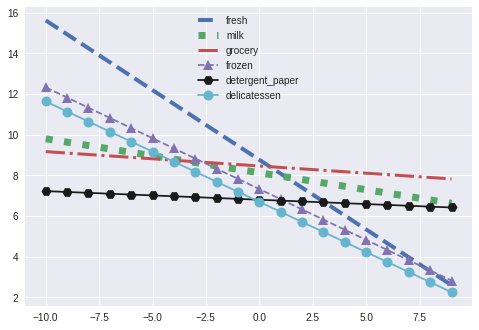

In [36]:
inv_x_dim=[]
for i in xrange(-10,10):
    y=[0,i,0,0,0,0] # dummy vector with dimension 1 changing and keeping all others constant
   # print i
    x=pca.inverse_transform(y)
    inv_x_dim.append(x)
inv_x_dim=np.array(inv_x_dim)
rang=xrange(-10,10)

fig, ax = plt.subplots()
ax.plot(rang, inv_x_dim[:,0], 'b--',linewidth=4,label='fresh')
ax.plot(rang, inv_x_dim[:,1], 'g:',linewidth=7,label='milk')
ax.plot(rang, inv_x_dim[:,2], 'r-.',linewidth=3,label='grocery')
ax.plot(rang, inv_x_dim[:,3], 'm^--',markersize=10,label='frozen')
ax.plot(rang, inv_x_dim[:,4], 'kH-',markersize=10,label='detergent_paper')
ax.plot(rang, inv_x_dim[:,5], 'co-',markersize=10,label='delicatessen')
legend = ax.legend(loc='upper center', shadow=True)

plt.show()


#####  Observation of Dimension 3 simulation graph
Looking at the graph below, it can be seen that changes along dimension 3 is indicative of changes in spending in Fresh and delicatessen majorly. For frozen and detergent_paper spending change very less. And for other two categories it remains mostly flat

###### analysis of dimension 3
* Dimesnion 3 is composed of positive weights from **Delicatessen'(0.6286)** and **Frozen**(0.3150) and negative weights from **fresh(-0.6774)** , **Detergent_paper(-0.2117)**. Milk has small positive weight and grocery has small negative weight hence this dimension doesn't provide much info about spending in these categories. Based on weight decomposition following are the representations given by this dimension:
* Clearly high positive values indicate high spending on delicatessen and frozen coupled with low spending on Fresh
* Low negative values indicate high spending on fresh coupled with low spending on delicatessen 
* **Summary** : *Anlysis of values along this dimension will yield customer spending trends in Fresh as compared to frozen and delicatessen .*  
    

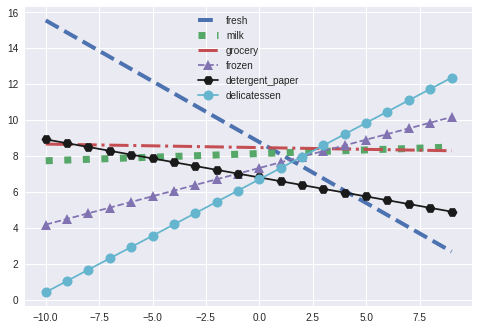

In [37]:
inv_x_dim=[]
for i in xrange(-10,10):
    y=[0,0,i,0,0,0] # dummy vector with dimension 1 changing and keeping all others constant
   # print i
    x=pca.inverse_transform(y)
    inv_x_dim.append(x)
inv_x_dim=np.array(inv_x_dim)
rang=xrange(-10,10)

fig, ax = plt.subplots()
ax.plot(rang, inv_x_dim[:,0], 'b--',linewidth=4,label='fresh')
ax.plot(rang, inv_x_dim[:,1], 'g:',linewidth=7,label='milk')
ax.plot(rang, inv_x_dim[:,2], 'r-.',linewidth=3,label='grocery')
ax.plot(rang, inv_x_dim[:,3], 'm^--',markersize=10,label='frozen')
ax.plot(rang, inv_x_dim[:,4], 'kH-',markersize=10,label='detergent_paper')
ax.plot(rang, inv_x_dim[:,5], 'co-',markersize=10,label='delicatessen')
legend = ax.legend(loc='upper center', shadow=True)

plt.show()


#####  Observation of Dimension 4 simulation graph
Looking at the graph below, it can be seen that changes along dimension 4 is indicative of changes in spending in Frozen ( increase with increasing value of dimension 4) and delicatessen (decrease with decreasing value of dimension 4) majorly. For other categories changes in spending are very less

###### analysis of dimension 4
* Dimesnion 4 is composed of positive weights from ** frozen(0.7854)** and **detergent_paper**(0.2096) and negative weights from  **Derlicatessen(-0.5423)** and **Fresh(-0.2043)**. Milk and grocery have small weights hence this dimension doesn't provide much info about spending in these categories. Based on weight decomposition following are the representations given by this dimension:
* Clearly high positive values indicate high spending on frozen coupled with low spending on Delicatessen
* high negative values indicate high spending on Delicatessen coupled with  low spending on frozen 
* **Summary** : *Anlysis of values along this dimension will yield customer spending trends in Frozen as compared to delicatessen .*  

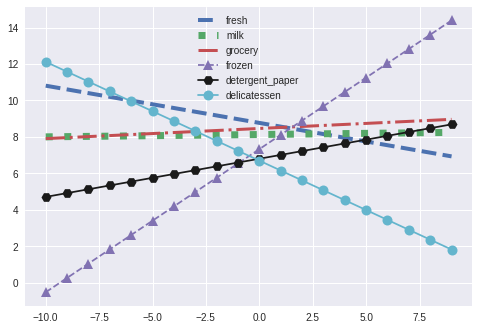

In [38]:
inv_x_dim=[]
for i in xrange(-10,10):
    y=[0,0,0,i,0,0] # dummy vector with dimension 1 changing and keeping all others constant
   # print i
    x=pca.inverse_transform(y)
    inv_x_dim.append(x)
inv_x_dim=np.array(inv_x_dim)
rang=xrange(-10,10)

fig, ax = plt.subplots()
ax.plot(rang, inv_x_dim[:,0], 'b--',linewidth=4,label='fresh')
ax.plot(rang, inv_x_dim[:,1], 'g:',linewidth=7,label='milk')
ax.plot(rang, inv_x_dim[:,2], 'r-.',linewidth=3,label='grocery')
ax.plot(rang, inv_x_dim[:,3], 'm^--',markersize=10,label='frozen')
ax.plot(rang, inv_x_dim[:,4], 'kH-',markersize=10,label='detergent_paper')
ax.plot(rang, inv_x_dim[:,5], 'co-',markersize=10,label='delicatessen')
legend = ax.legend(loc='upper center', shadow=True)

plt.show()


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [39]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0850,-0.3243,-0.2635,-0.8812,0.1862,-0.5347
1,1.5451,4.6262,0.9369,-0.1090,-0.0698,0.2437
2,-3.9269,-2.2171,1.0585,0.9489,-0.0491,0.0850


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [40]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [41]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0850,-0.3243
1,1.5451,4.6262
2,-3.9269,-2.2171


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

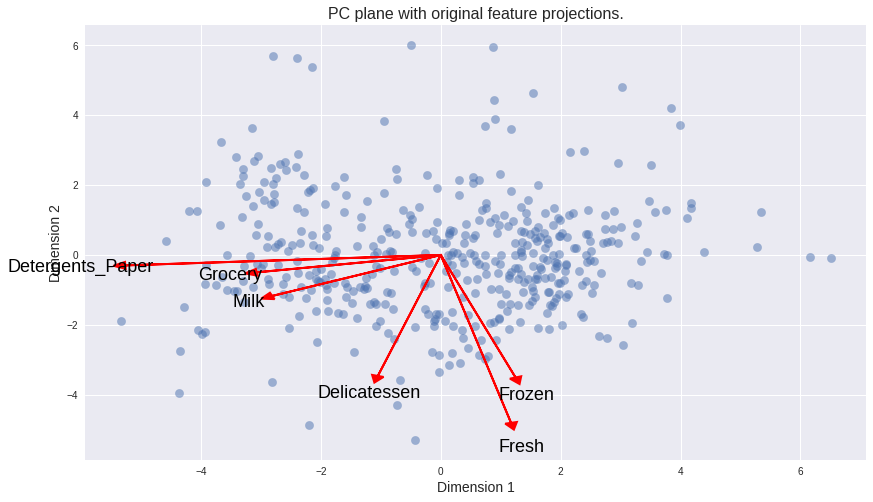

In [42]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
******
##### What are the advantages to using a K-Means clustering algorithm? #####
* K-mean perform very well on Datasets with clusters that are roughly equally-sized and shaped roughly regularly
* The clustering results are easy to interpret
* Faster, because order of time complexity is linear with the number of data


#####  What are the advantages to using a Gaussian Mixture Model clustering algorithm? #####
* Ability to handle overlapping clusters
* K-means assumes spherically symmetrical clusters, GMM clustering gives ability to form elliptical clusters with varying orientations
* GMM can handle disparate cluster sizes, whereas K-means assumes cluster sizes of same size

#####  Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why? #####
** *I would use GMM clustering due to following reasons* **
* There can be **overlapping segment memberships for some data points**. Consider a hypothetical segment of bakeries on biplot. Now consider another hypothetical segment of fine dine restaraunt. Some such a restaraunt can also be have bakery outlets and hence can have expenditure pattern similar to bakeries. The point is, certain data-points can have multiple segment memberships
* **Customer segment clusters are not necesserily spherically symmetric**. Consider, the same hypothetical case of bakery. So based on size of bakery the Milk and Grocery consumption can vary, hence a wide-range of values along dim-2 is possible. But same wide range is not possible along dim-1 which signifies Frozen , Delicatessen and fresh. Hence there will be segments that are not symmetricaaly spread along each dimension




### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [43]:

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

def silh_score(scoring_scheme,metric='euclidean'):
    score=dict()
    for n in xrange(2,10):   
        score_n=0
        for rand in xrange(0,100):   # averaging score over various random values
            clusterer = GaussianMixture(n_components=n,random_state=rand).fit(reduced_data)

            # TODO: Predict the cluster for each data point
            preds = clusterer.predict(reduced_data)

            # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
            if scoring_scheme=='silhouette':
                score_n = score_n+silhouette_score(reduced_data,preds,metric=metric)
            elif scoring_scheme=='bic':
                score_n = score_n+clusterer.bic(reduced_data)
            else:
                print 'provide valid scoring_scheme'
                return False
        score[n]=score_n/(rand+1)
    return score 
        
        
        

In [58]:
# initialising GMM 
clusterer = GaussianMixture(n_components=2,random_state=10).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
sample_pred_prob=clusterer.predict_proba(pca_samples)

In [45]:
silh_score('silhouette',metric='mahalanobis')   # calulating silhoutte score using mahalanobis distance metric

{2: 0.37604201752538208,
 3: 0.33904080639676581,
 4: 0.30165719690721721,
 5: 0.27635421267050231,
 6: 0.29451955935620205,
 7: 0.30165311408296308,
 8: 0.29738347386801239,
 9: 0.29572048898800868}

In [46]:
silh_score('silhouette') # calculating silhouette score using euclidean metric

{2: 0.42205143240311171,
 3: 0.37204108366537986,
 4: 0.31479792632613957,
 5: 0.27965332647205093,
 6: 0.30514271287041689,
 7: 0.31526190076822574,
 8: 0.30782507980962365,
 9: 0.30390340171668756}

In [47]:
silh_score('bic')  # bic scores

{2: 3566.6765380661336,
 3: 3580.8293140515416,
 4: 3596.1535202119203,
 5: 3609.2869237092468,
 6: 3636.2437174896686,
 7: 3657.4801527779196,
 8: 3680.2945427271111,
 9: 3705.8815727460592}

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Reffering to above scores , Bic; Silhouette (euclidean), Silhouette ( mahalanobis), 
N=2 has the best score in each of the three scoring methods. Hence, N=2 is the choice of n_clusters



### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

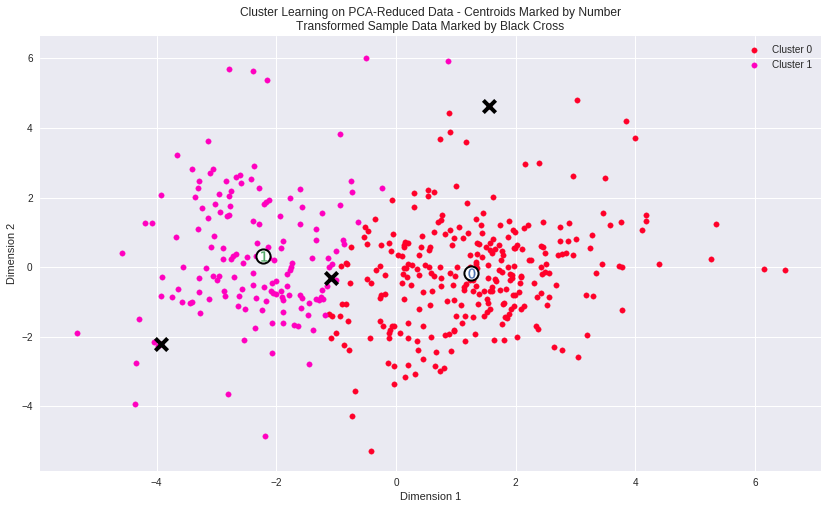

In [48]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [49]:
pca.inverse_transform(centers)

array([[ 9.09977064,  7.65620459,  7.9247955 ,  7.63775073,  5.86644113,
         6.59583908],
       [ 8.1753591 ,  8.96656316,  9.41073802,  6.7687055 ,  8.45447984,
         6.86922078]])

In [50]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
log_centers=pd.DataFrame(log_centers,columns = data.keys())
true_centers = log_centers.apply(lambda x: np.exp(x))

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.238924,2113.719745,2764.998845,2075.071163,352.990494,732.042874
Segment 1,3552.330347,7836.622044,12218.885411,870.184706,4696.063307,962.198508


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [51]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**
##### Segment 0 #######
* **Fresh** : Moderatly high expenditure (8953 mu) on fresh category. The median of complete data is at 8504 mu. 
* **Milk** : Low expenditure on Milk category (2241.36 mu). This value is in between 25 percentile (1522 mu) and median of complete data(3627 mu)
* **Grocery** : Low grocery comsumption (2767.81 mu). The 25% of complete data is at 2153 mu
* **Frozen** : Moderately high expenditure on frozen category (2075.75). The 50 percentile of data is at 1526 mu
* **Detergent_paper** : Very low consumptionon detergent and paper products (379). The 25 percentile of complete data is at 256.75 mu
* **Delicatessen** : Moderately low consumption of delicatessen (762.30 mu). Median of complete data is 965 mu

###### **Possible Establishments associated with this segment**
Apart from Detergent_paper all other product categories have either moderately low or moderately high consumption. Therefore Establishments associated with segments are **Restaraunts**, **Food joints** which serve a variety of items. Also eestablishments which have balanced consumption across various product categories are part of this segment. Such places include **Hostels** and **Offices**

*****
##### Segment 1#######
* **Fresh** : Low expenditure (3552.33 mu) on fresh category. The 25 percentile of complete data is at 3127.75 mu. 
* **Milk** : High expenditure on Milk category (7483 mu). The 75 percentile of complete data is at 7190.25 mu
* **Grocery** : Very High grocery comsumption (12335.81 mu). The 75% of complete data is at 10655.75 mu
* **Frozen** : very low expenditure on frozen category (794.75). The 25 percentile of data is at 742 mu
* **Detergent_paper** : Very high consumption on detergent and paper products (4576.77). The 75 percentile of complete data is at 3922 mu
* **Delicatessen** : Moderate consumption of delicatessen (854 mu). Median of complete data is 965 mu

###### **Possible Establishments associated with this segment**
As consumption in Fresh and frozen category is low, establishments associated with this segment can't be restaraunts, Supermarkets, Food Joints.
High consumption of Milk and grocery indicate that establishments in this category can be **Bakery** and **Retailers selling predominantly groceries and milk products**
Owing to high consumption in Detergent_paper category, Establishments such as **Laundry**,  are also in this segment

******


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [115]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "\n Sample point", i, "predicted to be in Cluster", pred, 


 Sample point 0 predicted to be in Cluster 1 
 Sample point 1 predicted to be in Cluster 0 
 Sample point 2 predicted to be in Cluster 1


In [112]:
# display responsibilities
for i, pred in enumerate(sample_pred_prob):
    print "Sample point", i, "predicted prob to be in Cluster 0,1", pred[0],pred[1]

Sample point 0 predicted prob to be in Cluster 0,1 0.451463917934 0.548536082066
Sample point 1 predicted prob to be in Cluster 0,1 0.909389969127 0.0906100308735
Sample point 2 predicted prob to be in Cluster 0,1 0.0128723645415 0.987127635458


In [55]:
data.iloc[indices]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
5,9413,8259,5126,666,1795,1451
355,190,727,2012,245,184,127
251,6134,23133,33586,6746,18594,5121


In [57]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.238924,2113.719745,2764.998845,2075.071163,352.990494,732.042874
Segment 1,3552.330347,7836.622044,12218.885411,870.184706,4696.063307,962.198508


In [109]:
from sklearn.neighbors import DistanceMetric as dis
def dist(x,y,cor,metric):
    if metric == 'mahalanobis':
        d=dis.get_metric(metric,V=cor)
    else:
        d=dis.get_metric(metric)
    return d.pairwise(np.array([x,y]))
    


In [121]:
print 'Analysis of euclidean distance'
# euclidean distance between sample points and cluster centers
for i,x in enumerate(indices):
    print '\t sample point',i
    print '\t \t cluster 0:',dist(data.iloc[x],true_centers.iloc[0],data.corr(),'euclidean')[0][1],'\tcluster 1:',dist(data.iloc[x],true_centers.iloc[1],data.corr(),'euclidean')[0][1]
print '\n Analysis of mahalanobis distance' 
# mahalanobis distance between sample points and cluster centers
for i,x in enumerate(indices):
    print '\t sample point',i
    print '\t \t cluster 0:',dist(data.iloc[x],true_centers.iloc[0],data.corr(),'mahalanobis')[0][1],'\t cluster 1:',dist(data.iloc[x],true_centers.iloc[1],data.corr(),'mahalanobis')[0][1]
    print 


Analysis of euclidean distance
	 sample point 0
	 	 cluster 0: 6937.71925165 	cluster 1: 9671.17686599
	 sample point 1
	 	 cluster 0: 9111.9784068 	cluster 1: 13692.3200556
	 sample point 2
	 	 cluster 0: 42113.030185 	cluster 1: 30694.8083915

 Analysis of mahalanobis distance
	 sample point 0
	 	 cluster 0: 8138.82856494 	 cluster 1: 16548.8602135

	 sample point 1
	 	 cluster 0: 9030.84352389 	 cluster 1: 17584.672241

	 sample point 2
	 	 cluster 0: 43437.6047608 	 cluster 1: 27465.4267266



**Answer:**
*****
###### sample point 0 
* **observation by comparing feature value of sample points with that of cluster centers**:  Just by observing the values of features in this point and comparing it with segment centers, this sample seems to have qualities of both the clusters. It has very high consumption in fresh (property of segment 0, segment of restaraunts), Detergent_paper( property of segment 1, segment of retailers). 
    Considering the euclidean and mahalanobis distance, this sample point is nearer to center of cluster 0

* **Preliminary prediction**: Initial guess of establishmentis, A Food joint in some busy business area which is serving a variety of food. Using definition of clusters made in Q 8 **it belongs to segment 0**
* **Segment allotation**: The customer **segment alloted as per algorithm is Segment1**. Interest point to note is that there is not much difference in responsibilities of different cluster.**Segment 1 responsibility : 54% and segment 0 responsibility : 46%**. This indicates that this sample has overlapping membership of the two customer segment
* **analysis**: The initial guess was wrong but a important point was noticed that the restaurant serves a veriety and food and is located in a busy area, this characteristic enables it share membership with cluster 1.
    Sample point has overlapping membership. Hence,establishment that is represented by this sample point must have characteristics of both segments. Some possible establishments can be
    * Hotel with restaraunt
    * A retail store with self service fast food counter
    
###### sample point 1
* **observation by comparing feature value of sample points with that of cluster centers**: 
    On calculation of euclidian and mahalanobis distance ( done in above cell), the data point is closer to segment 1 center

* **Preliminary prediction**: initialially it was predicted to be a office of software company as consumption as balanced across every category and low. Hence **segment 0**
* **Segment allotation**: he customer segment alloted as per algorithm is **Segment0**. 
* **analysis**: Segment 0 represents establishments where consumption can be lower than moderate but balanced across various segments ( as answered in Q8). The initial guess, closeness to center, and final gmm prediction are consistent

###### sample point 2
* **observation by comparing feature value of sample points with that of cluster centers**: 
    On calculation of euclidian and mahalanobis distance ( done in above cell), the data point is closer to segment 0 center

* **Preliminary prediction**: Initial guess was that this point represents a retailer. Hence **segment 1**
* **Segment allotation**: he customer segment alloted as per algorithm is **Segment1**. 
* **analysis**: Segment 1 represents establishments such as retailers. Hence the initial prediction and gmm predictions are consistent

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
*****
#### How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?

* **Can we assume the change affects all customers equally?** : A major change such as delivery frequency will affect each customer segment in a different way due to large variation in daily consumption patterns of establishments belonging to each segment. Hence the effect of change would be different on different customer segments 

###### **How can we determine which group of customers it affects the most? Using a statistical test**
A/B testing can be performed for a certain duration say 3 months, so that data obtained is statistically relevant. Consider the following design of test:
* **A(control group)** : customers to whom 5 day delivery schedule is provided. Control group should be larger in number, so that Wholeseller reduces risk of loosing customer
* **B(experimental group)** : customers to whom 3 day delivery schedule is provided
* **Method to asssign customers to control or experimental group** : As part of design of experiment, in both Control and experimental group almost equal number of customers from segment 0 and segment 1 should be present. This would allow to judge reaction of each customer segment towards the service change. Following would be composition of A and B groups if there wer 200 customers ( 100 of each segment)
    * control group(A) : 70 (Segment0), 70 (segment1) ; experimental group (B): 30 (Segment0), 30 (segment1). Note that total number of cases in group B are delibrately kept low to mitigate risk of loosing customer
    * Practical approach to populating control and experiment group : Use the GMM model to obtain the cluster prediction for each customer in Database. For new customers intially they can be randomly assigned to any of the groups and when purchace data builds up they also can be alloted to a specific cluster. Build test set of customers for Control group by randomly picking equal number from each segment.
* **parameters to be reported** : The customer reaction can be measured by observing the changes in buying pattern Buying pattern mean, what is the change in volume of products being bought my a particular customer.
* **interpretation of results of A/B testing**: After the duration of test is complete, the average change in volume of products bought for each customer segment can be made in control and experimental group. Consider following example:
    * In control group(A), suppose total 70 segment0 customers were tested. In experimental group, suppose 30 segment0 customers were tested. In control group it was observed that on an average volume being purchaced by segment0 customers has not fallen ( it was expected, in 5 day delivery schedule the customers demand shouldn't change). But it was found that in Experimental group also average change in volume being purcahced has not fallen. It suggests that Segment0 customers have reacted positively to change in delivery schedule, as their volume of purchace hasnt fallen

##### Qualitative analysis of effect of change of delivery  ######

* To estimate effect on each segment, following has to be considered
    * the consumption rate of products by customer
    * expected loss incurred by customer in case of inavailability of product to him
    * Storage cost incurred by consumer
* Based on above mentioned factors following is a qualitative analysis of reaction of each customer segment to delivery schedule    
    * **Segment 1** customers are establishments which are  Retailers, Laundaries and Bakeries. These have  volume of daily sales which is quite consistent ( assuming these establishments are commercially well established). Reduction in delivery frequency will force these establishments to stock higher amounts of these products hence increasing material handling cost and wastages. Clearly **segment 1 customers will be negatively effected**
    * On th other hand **segment0** customers have moderate usage of these products. The establishments in this segment such as restaraunts, Foot-joints, Offices have varying daily consumption. Also these establishments always have necessary stock to cater customers. **This segment won't be negatively affected by reduction in delivery frequency**
    
** On consideration of above mentioned factors, customer segment 1 will respond negatively whereas customer segment 0 will react positively**


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Now that additional structure to data is available, a supervised learning algorithm( SVM, logistic regression) can be used for obtaining customer segment class of 10 new customers. Training data is already avilable data along with customer segment labels. A Supervised learner can be trained on this data (Spending in each product category) along with customer segments obtained from Clustering algorithm.
Target variable is customer segment


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

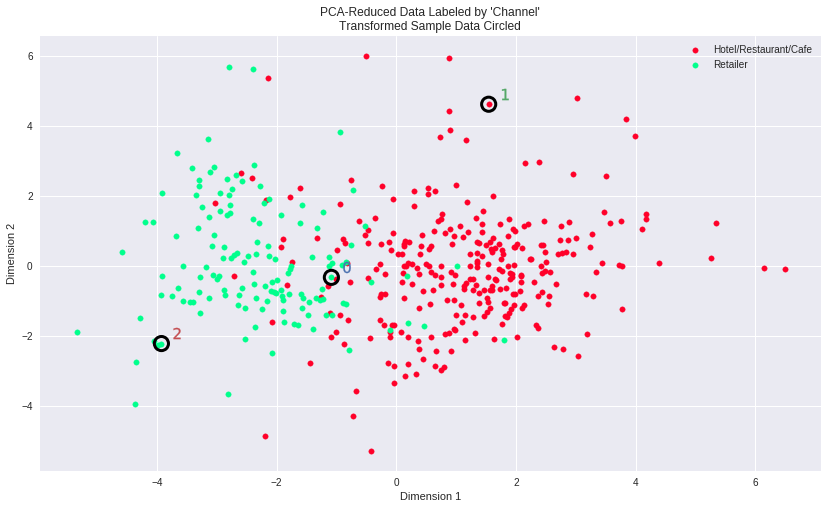

In [60]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
##### How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?  ####

Numbers of cluster choosen were 2 in the GMM clustering done in above questions. And the resulting clustering matches well with the underlying distribution of Hotel/restaraunts/cafe to Retailers. On the left side of bi-plot 'retailers' are plotted, same is the case obtained with plotting segments obtained after clusterring. While on the right hand side, 'Hotels/restaraunts/cafes' are plotted same is the case with plot obtained from clustering algo. To conclude, clustering algorithm has done well to capture underlying distribution

##### Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?  ######
The points that are far away from cluster boundary can be classified purely as either 'Retailers' or 'Hotel/Restaraunt/cafe'. 

##### Would you consider these classifications as consistent with your previous definition of the customer segments? #####
Yes, as answered in question 8. The establishments associated with Segment 1 were retailers and that associated with segment 0 were Restaraunts/Cafe. So I consider these classifications consistent with definition of customer segments


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.